In [1]:
import pandas as pd

# Load CSV file
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")

df.shape

(253680, 22)

In [2]:
def delete_instances(df,percentage=0.9):

    # Calculate the number of instances with 0 in the feature HeartDiseaseorAttack
    num_zeros = len(df[df['HeartDiseaseorAttack'] == 0])

    # Calculate the number of instances to delete
    num_to_delete = int(num_zeros * percentage )

    # Get the indices of instances with 0 in the feature HeartDiseaseorAttack
    indices_to_delete = df[df['HeartDiseaseorAttack'] == 0].sample(num_to_delete, random_state=1).index

    # Delete the instances from the dataframe
    df = df.drop(indices_to_delete)
    return df


In [3]:
df = delete_instances(df,percentage=0.9)

df['HeartDiseaseorAttack'].value_counts()

1.0    23893
0.0    22979
Name: HeartDiseaseorAttack, dtype: int64

In [4]:
# Concatenate the number of unique values and data types 
side_by_side = pd.concat([df.nunique(), df.dtypes], axis=1)

# Print the result
print(side_by_side)


                       0        1
HeartDiseaseorAttack   2  float64
HighBP                 2  float64
HighChol               2  float64
CholCheck              2  float64
BMI                   75  float64
Smoker                 2  float64
Stroke                 2  float64
Diabetes               3  float64
PhysActivity           2  float64
Fruits                 2  float64
Veggies                2  float64
HvyAlcoholConsump      2  float64
AnyHealthcare          2  float64
NoDocbcCost            2  float64
GenHlth                5  float64
MentHlth              31  float64
PhysHlth              31  float64
DiffWalk               2  float64
Sex                    2  float64
Age                   13  float64
Education              6  float64
Income                 8  float64


In [5]:
import numpy as np

# Identify features with only 2 unique values
binary_features = [col for col in df.columns if df[col].nunique() == 2]
binary_features.remove('HeartDiseaseorAttack')

# Convert binary features to binary type
df[binary_features] = df[binary_features].astype(int)

numerical_features = ['BMI','MentHlth', 'PhysHlth','Age','HeartDiseaseorAttack']
df[numerical_features] = df[numerical_features].astype(np.int64)


# Convert remaining features to ordinal type
ordinal_features = [col for col in df.columns if col not in binary_features and col not in numerical_features]
df[ordinal_features] = df[ordinal_features].astype(int)


In [6]:
df["HighBP"] = df["HighBP"].replace({0: -1})
df["HighChol"] = df["HighChol"].replace({0: -1})
df["CholCheck"] = df["CholCheck"].replace({0: -1})
df["Smoker"] = df["Smoker"].replace({0: -1})
df["Stroke"] = df["Stroke"].replace({0: -1})
df["PhysActivity"] = df["PhysActivity"].replace({0: -1})
df["Fruits"] = df["Fruits"].replace({0: -1})
df["Veggies"] = df["Veggies"].replace({0: -1})
df["HvyAlcoholConsump"] = df["HvyAlcoholConsump"].replace({0: -1})
df["AnyHealthcare"] = df["AnyHealthcare"].replace({0: -1})
df["NoDocbcCost"] = df["NoDocbcCost"].replace({0: -1})
df["DiffWalk"] = df["DiffWalk"].replace({0: -1})
df["Sex"] = df["Sex"].replace({0: -1}) # -1 Female, 1 Male


In [7]:
df.iloc[0:10,:]

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
8,1,1,1,1,30,1,-1,2,-1,1,...,1,-1,5,30,30,1,-1,9,5,1
10,0,-1,-1,1,25,1,-1,2,1,1,...,1,-1,3,0,0,-1,1,13,6,8
20,1,1,1,1,22,-1,1,0,-1,1,...,1,-1,3,30,0,1,-1,12,4,4
26,1,1,1,1,37,1,1,2,-1,-1,...,1,-1,5,0,0,1,1,10,6,5
27,1,1,1,1,28,1,-1,2,-1,-1,...,1,-1,4,0,0,-1,1,12,2,4
31,0,1,-1,1,33,1,-1,0,1,1,...,-1,-1,1,0,0,1,1,13,3,3
47,1,1,1,1,25,1,-1,0,-1,1,...,1,-1,2,1,0,-1,1,10,4,7
50,1,1,1,1,30,1,-1,0,1,-1,...,1,-1,4,10,17,1,-1,9,4,1
54,0,-1,1,1,34,1,-1,0,-1,-1,...,1,-1,2,4,0,-1,-1,4,6,8
58,1,1,1,1,33,1,-1,0,1,-1,...,1,-1,3,1,0,-1,1,11,6,6


In [8]:
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].unique()

unique_values


{'HeartDiseaseorAttack': array([1, 0]),
 'HighBP': array([ 1, -1]),
 'HighChol': array([ 1, -1]),
 'CholCheck': array([ 1, -1]),
 'BMI': array([30, 25, 22, 37, 28, 33, 34, 20, 38, 21, 23, 27, 32, 31, 29, 35, 19,
        24, 39, 17, 26, 36, 45, 47, 49, 18, 42, 41, 46, 40, 48, 44, 16, 43,
        51, 54, 53, 63, 55, 50, 14, 15, 61, 58, 85, 52, 57, 62, 59, 56, 72,
        13, 64, 66, 60, 82, 89, 75, 79, 77, 92, 81, 73, 98, 84, 71, 87, 74,
        95, 65, 67, 70, 68, 90, 12]),
 'Smoker': array([ 1, -1]),
 'Stroke': array([-1,  1]),
 'Diabetes': array([2, 0, 1]),
 'PhysActivity': array([-1,  1]),
 'Fruits': array([ 1, -1]),
 'Veggies': array([ 1, -1]),
 'HvyAlcoholConsump': array([-1,  1]),
 'AnyHealthcare': array([ 1, -1]),
 'NoDocbcCost': array([-1,  1]),
 'GenHlth': array([5, 3, 4, 1, 2]),
 'MentHlth': array([30,  0,  1, 10,  4,  2, 15,  5,  3,  7, 29, 20, 25, 28, 14, 21, 12,
         6, 13, 24,  8, 27, 26, 23, 19, 18, 16, 22, 17, 11,  9]),
 'PhysHlth': array([30,  0, 17,  5,  2, 10,  3,

In [9]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [10]:
# Distinguish the context features from the behavioral features
context_features = ["HighBP", 'HighChol', 'CholCheck', 'Stroke','Diabetes','DiffWalk','Sex','Age','Education','Income','MentHlth']
behavioral_features = [col for col in df.columns if col not in context_features]
behavioral_features.remove('HeartDiseaseorAttack')

print("Context Features:",context_features ,"\nBehavioral Features:", behavioral_features)

Context Features: ['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'Diabetes', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'MentHlth'] 
Behavioral Features: ['BMI', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'PhysHlth']


In [11]:
# sample 20% of the data for faster processing
df = df.sample(frac=0.2, random_state=1)

In [12]:
# Seperating the features from the target

X = df.drop('HeartDiseaseorAttack', axis=1)  # Features
#X.dropna(axis=1, inplace=True,how='any')
y = df['HeartDiseaseorAttack']  # Target

# Pycaret Model Comparison

In [13]:
from pycaret.classification import setup, compare_models, plot_model

In [14]:
# Creating 2 datasets: one with the behavioral features and the other with the context features

df_behavioral = df[behavioral_features + ['HeartDiseaseorAttack']]
df_context = df[context_features + ['HeartDiseaseorAttack']]

In [15]:
# Set up the environment
setup(data=df, target='HeartDiseaseorAttack', session_id=1)

# Compare the models and get the feature importance
best_model = compare_models(sort='Accuracy', n_select=5, fold=10)

,Description,Value
0,Session id,1
1,Target,HeartDiseaseorAttack
2,Target type,Binary
3,Original data shape,"(9374, 22)"
4,Transformed data shape,"(9374, 22)"
5,Transformed train set shape,"(6561, 22)"
6,Transformed test set shape,"(2813, 22)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7763,0.0000,0.8131,0.7629,0.7871,0.5518,0.5532,0.0110
gbc,Gradient Boosting Classifier,0.7761,0.8493,0.8244,0.7571,0.7892,0.5514,0.5538,0.2340
lda,Linear Discriminant Analysis,0.7761,0.8485,0.8128,0.7628,0.7869,0.5515,0.5529,0.0190
lr,Logistic Regression,0.7737,0.8495,0.7984,0.7665,0.7820,0.5468,0.5475,0.4030
lightgbm,Light Gradient Boosting Machine,0.7695,0.8415,0.8185,0.7511,0.7832,0.5382,0.5406,0.4950
ada,Ada Boost Classifier,0.7671,0.8465,0.7816,0.7657,0.7734,0.5339,0.5343,0.0870
rf,Random Forest Classifier,0.7615,0.8324,0.8029,0.7473,0.7740,0.5221,0.5239,0.1730
xgboost,Extreme Gradient Boosting,0.7540,0.8270,0.7837,0.7460,0.7642,0.5074,0.5083,0.0670
et,Extra Trees Classifier,0.7462,0.8196,0.7819,0.7360,0.7581,0.4917,0.4929,0.1970
qda,Quadratic Discriminant Analysis,0.7374,0.8100,0.7343,0.7457,0.7398,0.4748,0.4750,0.0150


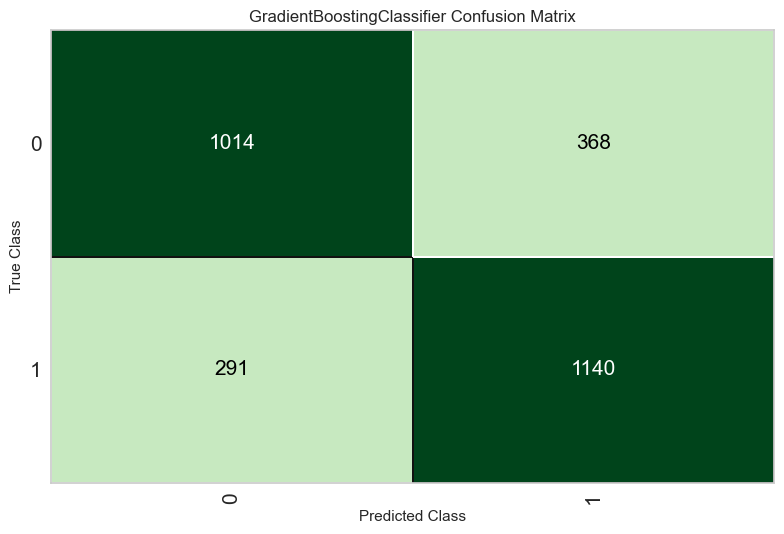

In [16]:
# Plot the confusion matrix of behavior-based model
plot_model(best_model[1], plot='confusion_matrix')

In [17]:
# Set up the environment
setup(data=df_behavioral, target='HeartDiseaseorAttack', session_id=1)

# Compare the models and get the feature importance
best_model = compare_models(sort='Accuracy', n_select=5, fold=10)

,Description,Value
0,Session id,1
1,Target,HeartDiseaseorAttack
2,Target type,Binary
3,Original data shape,"(9374, 11)"
4,Transformed data shape,"(9374, 11)"
5,Transformed train set shape,"(6561, 11)"
6,Transformed test set shape,"(2813, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.6970,0.7574,0.6992,0.7035,0.7011,0.3939,0.3941,0.0570
lr,Logistic Regression,0.6947,0.7584,0.6582,0.7184,0.6867,0.3901,0.3918,0.0410
ridge,Ridge Classifier,0.6938,0.0000,0.6525,0.7197,0.6842,0.3884,0.3904,0.0060
lda,Linear Discriminant Analysis,0.6938,0.7583,0.6525,0.7197,0.6842,0.3884,0.3904,0.0130
gbc,Gradient Boosting Classifier,0.6917,0.7563,0.6815,0.7033,0.6920,0.3835,0.3838,0.1430
lightgbm,Light Gradient Boosting Machine,0.6821,0.7428,0.6809,0.6902,0.6852,0.3641,0.3645,0.4780
qda,Quadratic Discriminant Analysis,0.6752,0.7195,0.6809,0.6810,0.6807,0.3502,0.3505,0.0070
xgboost,Extreme Gradient Boosting,0.6651,0.7211,0.6603,0.6746,0.6671,0.3303,0.3307,0.0420
nb,Naive Bayes,0.6552,0.7181,0.5752,0.6950,0.6289,0.3124,0.3176,0.0080
rf,Random Forest Classifier,0.6420,0.6878,0.6507,0.6478,0.6491,0.2836,0.2838,0.1340


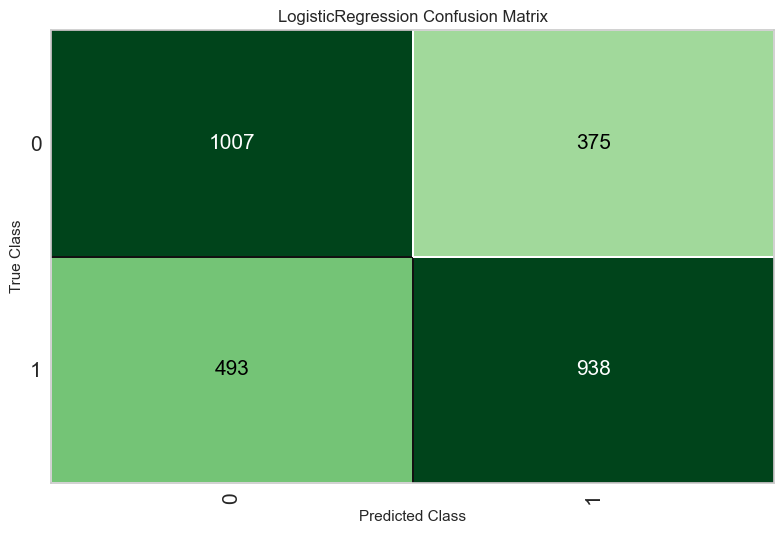

In [18]:
# Plot the confusion matrix of behavior-based model
plot_model(best_model[1], plot='confusion_matrix')

In [19]:
# Set up the environment
setup(data=df_context, target='HeartDiseaseorAttack', session_id=1)

# Compare the models and get the feature importance
best_model = compare_models(sort='Accuracy', n_select=5, fold=10)

,Description,Value
0,Session id,1
1,Target,HeartDiseaseorAttack
2,Target type,Binary
3,Original data shape,"(9374, 12)"
4,Transformed data shape,"(9374, 12)"
5,Transformed train set shape,"(6561, 12)"
6,Transformed test set shape,"(2813, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7581,0.8335,0.8071,0.7409,0.7725,0.5153,0.5176,0.1230
lda,Linear Discriminant Analysis,0.7542,0.8305,0.7966,0.7406,0.7674,0.5075,0.5092,0.0070
ridge,Ridge Classifier,0.7540,0.0000,0.7966,0.7403,0.7673,0.5072,0.5089,0.0100
lr,Logistic Regression,0.7538,0.8319,0.7810,0.7471,0.7635,0.5071,0.5079,0.0250
ada,Ada Boost Classifier,0.7519,0.8299,0.7681,0.7506,0.7591,0.5034,0.5037,0.0580
lightgbm,Light Gradient Boosting Machine,0.7513,0.8260,0.8074,0.7320,0.7676,0.5014,0.5047,0.4540
qda,Quadratic Discriminant Analysis,0.7342,0.8156,0.7163,0.7501,0.7327,0.4686,0.4693,0.0100
xgboost,Extreme Gradient Boosting,0.7330,0.8107,0.7723,0.7224,0.7463,0.4651,0.4666,0.0410
nb,Naive Bayes,0.7313,0.8136,0.6923,0.7588,0.7239,0.4632,0.4653,0.0090
rf,Random Forest Classifier,0.7229,0.7915,0.7516,0.7178,0.7342,0.4452,0.4458,0.1370


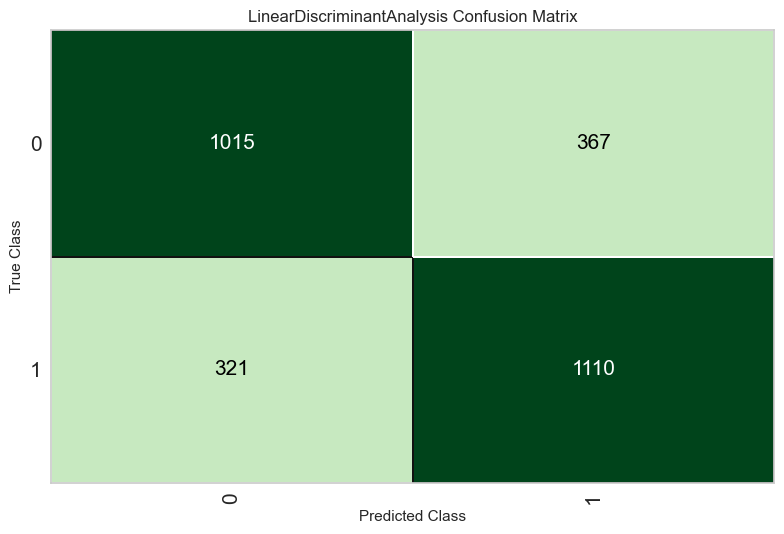

In [20]:
# Plot the confusion matrix of behavior-based model
plot_model(best_model[1], plot='confusion_matrix')

# Train Light Gradient Boosting Machine model with sklearn

In [21]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# Create an instance of LinearDiscriminantAnalysis
lgbm = GradientBoostingClassifier()

lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)

In [22]:
y_predict = lgbm.predict(X_test)

a = classification_report(y_test, y_predict)

print(confusion_matrix(y_test, y_predict))

print(a)

[[644 269]
 [163 799]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       913
           1       0.75      0.83      0.79       962

    accuracy                           0.77      1875
   macro avg       0.77      0.77      0.77      1875
weighted avg       0.77      0.77      0.77      1875



# Shapley Values Analysis

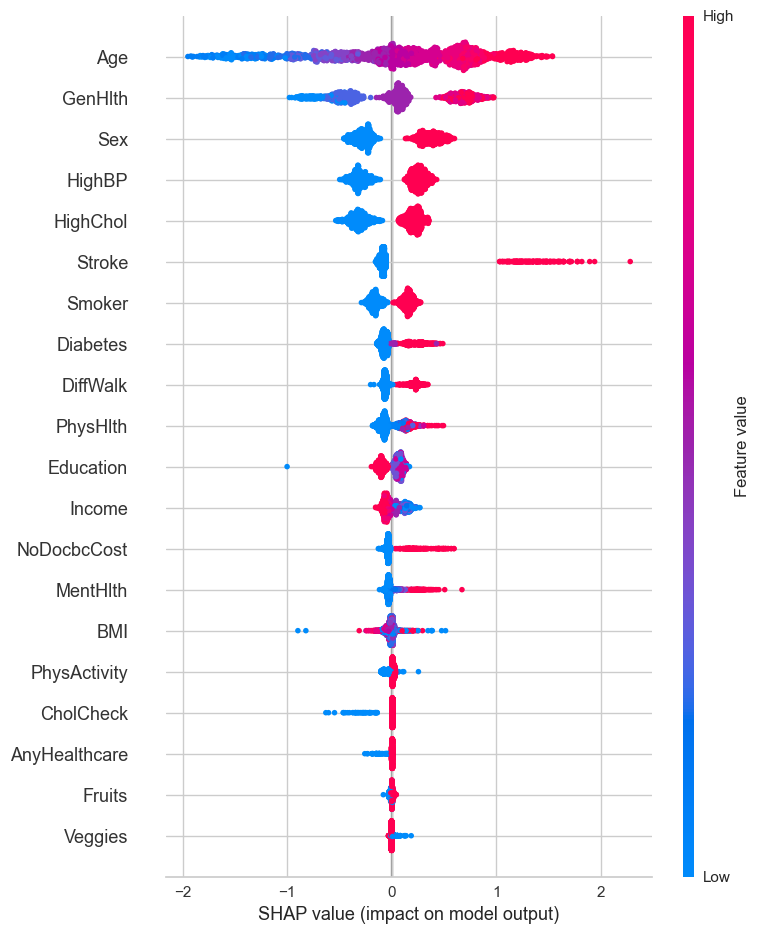

In [23]:
# Calculating and plotting the Shapley values

# In order to work, the values of the features should be integers and not boolean

import shap

# Create an explainer object for the LDA model
explainer = shap.TreeExplainer(lgbm, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test)


In [24]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=True,inplace=True,ignore_index=True)
feature_importance

,col_name,feature_importance_vals
0,HvyAlcoholConsump,0.005472
1,Veggies,0.006308
2,Fruits,0.008373
3,AnyHealthcare,0.009375
4,CholCheck,0.013658
5,PhysActivity,0.026705
6,BMI,0.034061
7,MentHlth,0.048380
8,NoDocbcCost,0.058952
9,Income,0.077143


In [25]:
# Create a list of colors for the features depending on whether they are context or behavioral features
colors = []
for feature in feature_importance['col_name']:
    if feature in context_features:
        colors.append('red')
    elif feature in behavioral_features:
        colors.append('blue')


In [26]:
import pandas as pd

# Create a new column 'Color' in the 'feature_importance' dataframe
feature_importance['Color'] = colors

# Print the updated dataframe
print(feature_importance)


             col_name  feature_importance_vals Color
0   HvyAlcoholConsump                 0.005472  blue
1             Veggies                 0.006308  blue
2              Fruits                 0.008373  blue
3       AnyHealthcare                 0.009375  blue
4           CholCheck                 0.013658   red
5        PhysActivity                 0.026705  blue
6                 BMI                 0.034061  blue
7            MentHlth                 0.048380   red
8         NoDocbcCost                 0.058952  blue
9              Income                 0.077143   red
10          Education                 0.082060   red
11           PhysHlth                 0.105084  blue
12           DiffWalk                 0.109150   red
13           Diabetes                 0.109696   red
14             Smoker                 0.158355  blue
15             Stroke                 0.214711   red
16           HighChol                 0.255170   red
17             HighBP                 0.281212

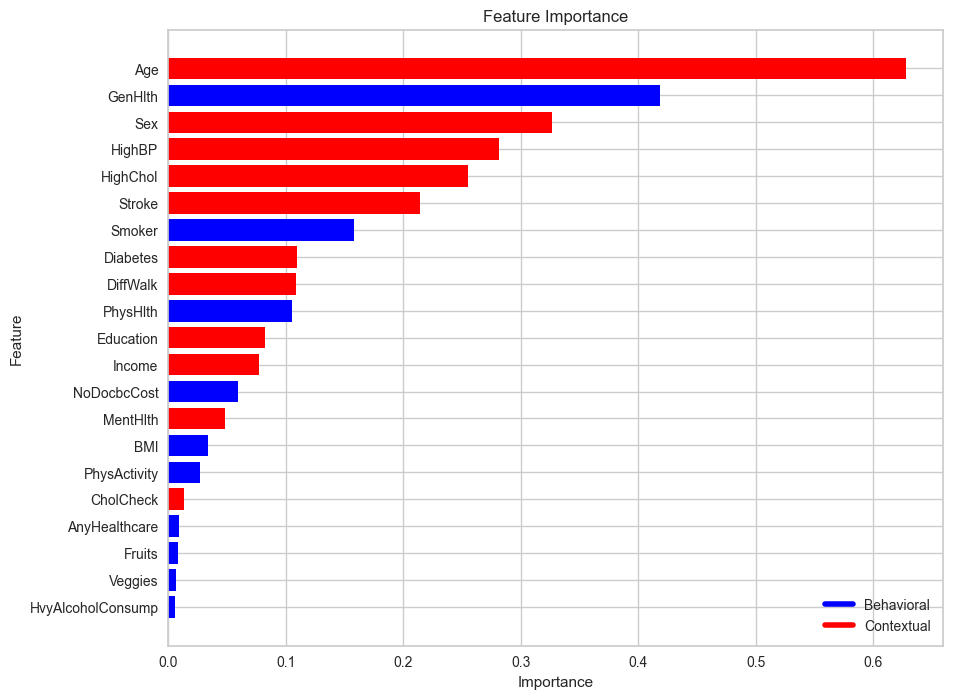

In [27]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Create the horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['col_name'], feature_importance['feature_importance_vals'], color=colors)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
legend_elements = [ Line2D([0], [0], color='blue', label='Behavioral', lw=4),
                   Line2D([0], [0], color='red', label='Contextual', lw=4)]

plt.legend(handles=legend_elements, loc='lower right')
plt.show()


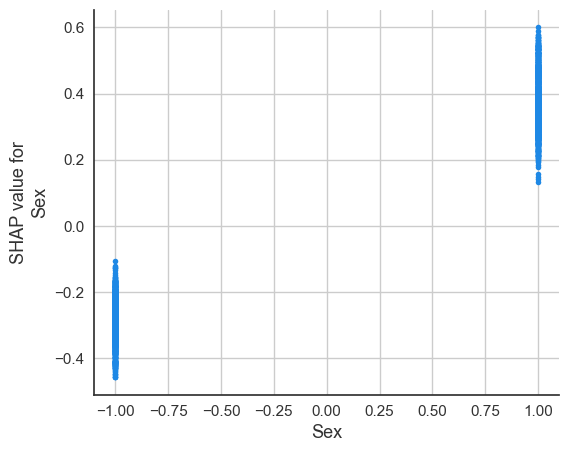

In [28]:
shap.dependence_plot("Sex", shap_values, X_test, interaction_index=None)

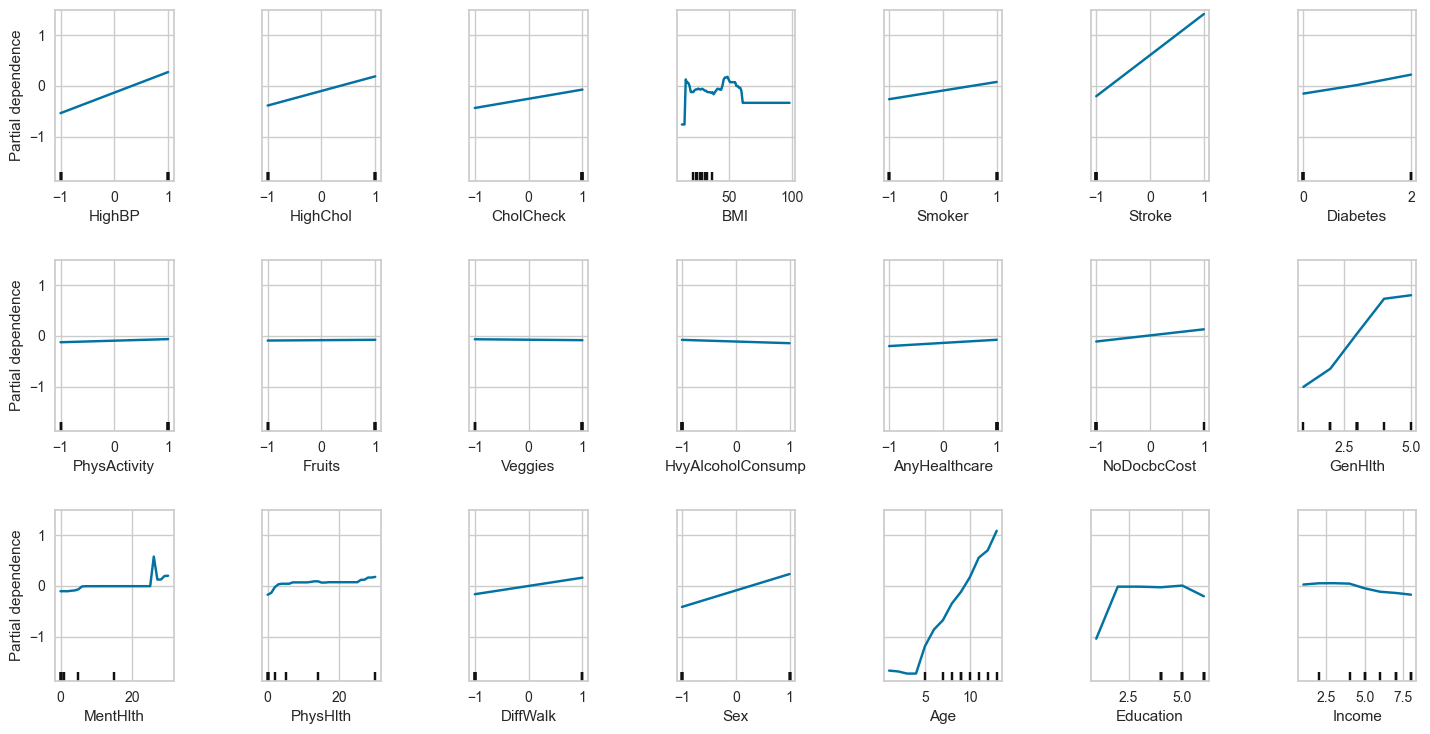

In [29]:
# Plot the Partial Dependence plot
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=7, nrows=3, figsize=(15, 8), constrained_layout=True)
fig.tight_layout(pad=3.0, w_pad=3.0, h_pad=3.0)

# Create an instance of PartialDependenceDisplay
pdp_display = PartialDependenceDisplay.from_estimator(lgbm, X_train, features=X_train.columns,ax=ax)


## Evaluating the changes of coefficients when trained on behavioral only or all features

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create an instance of the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Create an array with coefficients and corresponding features
feature_names = X_train.columns.tolist()

coefficients_array = np.column_stack((feature_names, model.coef_.flatten()))

y_pred = model.predict(X_test)

accuracy_all = model.score(X_test, y_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.73      0.75       913
           1       0.75      0.80      0.78       962

    accuracy                           0.77      1875
   macro avg       0.77      0.76      0.76      1875
weighted avg       0.77      0.77      0.76      1875



In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create an instance of the logistic regression model
model = LogisticRegression()

model.fit(X_train[behavioral_features], y_train)

feature_names = X_train[behavioral_features].columns.tolist()

coefficients_array_behavioral = np.column_stack((feature_names, model.coef_.flatten()))

y_pred = model.predict(X_test[behavioral_features])

accuracy_behavioral = model.score(X_test[behavioral_features], y_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.68      0.72      0.70       913
           1       0.72      0.67      0.69       962

    accuracy                           0.70      1875
   macro avg       0.70      0.70      0.70      1875
weighted avg       0.70      0.70      0.70      1875



In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create an instance of the logistic regression model
model = LogisticRegression()

model.fit(X_train[context_features], y_train)

feature_names = X_train[context_features].columns.tolist()

coefficients_array_context = np.column_stack((feature_names, model.coef_.flatten()))

y_pred = model.predict(X_test[context_features])

accuracy_context = model.score(X_test[context_features], y_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.70      0.73       913
           1       0.74      0.78      0.76       962

    accuracy                           0.74      1875
   macro avg       0.74      0.74      0.74      1875
weighted avg       0.74      0.74      0.74      1875



In [33]:
import pandas as pd

# Create a DataFrame with the coefficients
coefficients = pd.DataFrame(coefficients_array, columns=["Feature", "Coefficient"])
coefficients['Coefficient'] = pd.to_numeric(coefficients['Coefficient'])


# Add to the behavioral coefficients DataFrame the coefficients of the model trained on all features
coefficients_array_behavioral = pd.DataFrame(coefficients_array_behavioral, columns=["Feature", "Behavioral_Coef"])
coefficients_array_behavioral = pd.DataFrame.merge(coefficients_array_behavioral,coefficients,on="Feature",how="left")
coefficients_array_behavioral['Behavioral_Coef'] = pd.to_numeric(coefficients_array_behavioral['Behavioral_Coef'])

# Add to the contextual coefficients DataFrame the coefficients of the model trained on all features
coefficients_array_context = pd.DataFrame(coefficients_array_context, columns=["Feature", "Context_Coef"])
coefficients_array_context = pd.DataFrame.merge(coefficients_array_context,coefficients,on="Feature",how="left")
coefficients_array_context['Contextual_Coef'] = pd.to_numeric(coefficients_array_context['Context_Coef'])

In [34]:
coefficients_array_context = coefficients_array_context.sort_values('Coefficient')
coefficients_array_behavioral = coefficients_array_behavioral.sort_values('Coefficient')

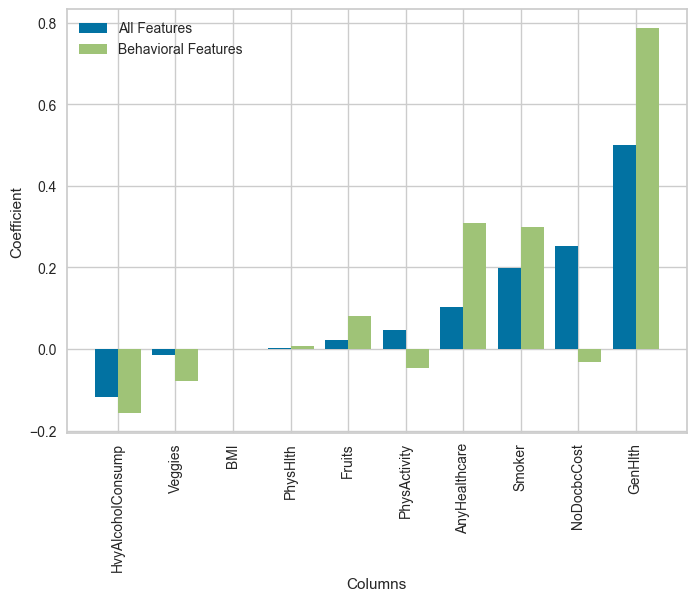

In [35]:
# Create barplot for all features and behavioral features
X_axis = np.arange(len(coefficients_array_behavioral["Feature"]))

plt.bar(X_axis - 0.2,coefficients_array_behavioral["Coefficient"],0.4,label="All Features")
plt.bar(X_axis + 0.2,coefficients_array_behavioral["Behavioral_Coef"],0.4,label="Behavioral Features")

plt.xticks(X_axis, coefficients_array_behavioral["Feature"], rotation=90)
plt.xlabel('Columns')
plt.ylabel('Coefficient')
plt.legend()
plt.show()


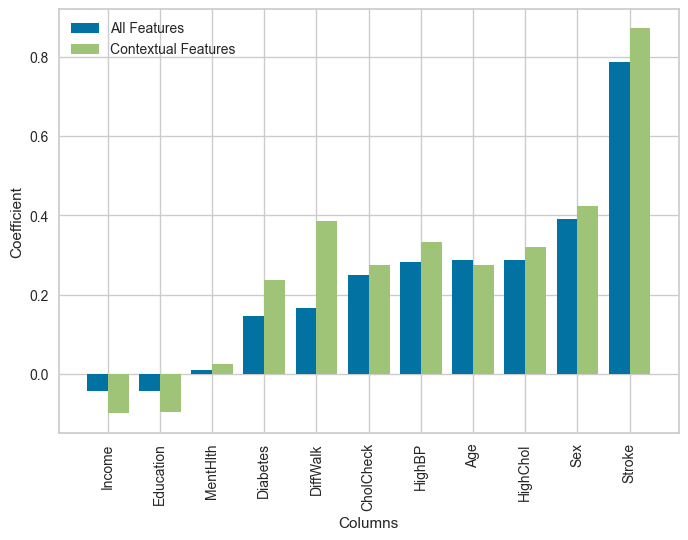

In [36]:
# Create barplot for all features and contextual features
X_axis = np.arange(len(coefficients_array_context["Feature"]))

plt.bar(X_axis - 0.2,coefficients_array_context["Coefficient"],0.4,label="All Features")
plt.bar(X_axis + 0.2,coefficients_array_context["Contextual_Coef"],0.4,label="Contextual Features")
plt.xticks(X_axis, coefficients_array_context["Feature"],rotation=90)
plt.xlabel('Columns')
plt.ylabel('Coefficient')
plt.legend()
plt.show()

## Sensitivity Analysis

In [37]:
# Create the initial dataframe with 'feature' column
results = pd.DataFrame(columns=['y'])

# Add columns 'y_1' to 'y_n' to the dataframe
for i in range(1, len(X_test)+1):
    results[f'y_{i}'] = None

model = LogisticRegression()

model.fit(X_train[behavioral_features], y_train)
y_pred = model.predict_proba(X_test[behavioral_features])[:, 0]

new_row = pd.DataFrame([["y_test"] + list(y_test)], columns=results.columns)
results = results.append(new_row, ignore_index=True)

# Create a new row with the label "Only Behavioral" and the values of y_pred
new_row = pd.DataFrame([["Only_Behavioral"] + list(y_pred)], columns=results.columns)

# Append the new row to the results dataframe
results = results.append(new_row, ignore_index=True)

f = "Sex"

sens_analysis_features = behavioral_features + [f]

model = LogisticRegression()

# Fit the model to the behavioral features plus one contextual feature
model.fit(X_train[sens_analysis_features], y_train)

# Create DataFrame for first iteration
temp = X_test[sens_analysis_features]

for i in [-1, 1]:
    # Replace the values of sex column with the value of i
    temp[f] = i

    # Predict the target variable using the trained model
    y_pred = model.predict_proba(temp)[: , 0]

    new_row = pd.DataFrame([[f"sex_{i}"] + list(y_pred)], columns=results.columns)

    # Append the new row to the results dataframe
    results = results.append(new_row, ignore_index=True)  

results = results.T
new_header = results.iloc[0] 
results = results[1:] 
results.columns = new_header
results



y,y_test,Only_Behavioral,sex_-1,sex_1
y_1,1,0.322286,0.375096,0.231373
y_2,0,0.540562,0.617718,0.447623
y_3,1,0.388068,0.478951,0.315528
y_4,0,0.167374,0.202119,0.112719
y_5,0,0.304275,0.358738,0.219086
...,...,...,...,...
y_1871,1,0.428795,0.534147,0.365086
y_1872,1,0.226792,0.315315,0.187621
y_1873,1,0.720856,0.782156,0.642933
y_1874,0,0.691876,0.749061,0.599518


In [38]:
results["sex_-1"] = results["sex_-1"] - results["Only_Behavioral"]
results['sex_1'] = results["sex_1"] - results["Only_Behavioral"]

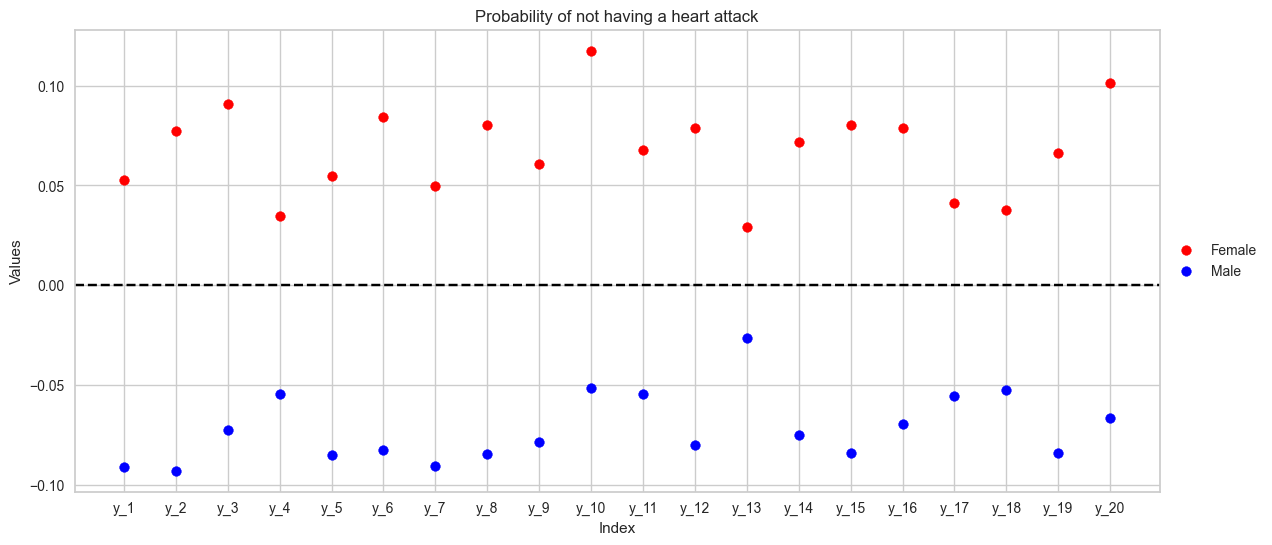

In [39]:
# Select the first 10 rows of the dataframe
df_subset = results.head(20)

# Create the scatter plot
plt.figure(figsize=(14, 6))
plt.scatter(df_subset.index, df_subset['sex_-1'], color='red', label='Female')
#plt.scatter(df_subset.index, df_subset['Only_Behavioral'], color='black', label='Only_Behavioral')
plt.scatter(df_subset.index, df_subset['sex_1'], color='blue', label='Male')

# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='--')

# Set the labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Probability of not having a heart attack')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#avg_Behavioral = results["Only_Behavioral"].mean()
#avg_Female = results['sex_-1'].mean()
#avg_Male = results['sex_1'].mean()

#print(f"Average of Female: {avg_Female}")
#print(f"Average of Behavioral Only: {avg_Behavioral}")
#print(f"Average of Male: {avg_Male}")



## LUPI

In [40]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import argparse
import lupi_svm as lupi
import warnings
warnings.filterwarnings("ignore")

parser = argparse.ArgumentParser()

parser.add_argument("--nJobs", help="number of processors available", default=6, type=int)
parser.add_argument("--dataset", help="the dataset file", default='heart_disease_health_indicators_BRFSS2015.csv', type=str)
parser.add_argument("--cv_score", help="cv_score: f1, accuracy", default='accuracy', type=str)
parser.add_argument("--cv_kfold", help="number of folds for cross validation", default=6, type=int)
parser.add_argument("--test_size", help="test_size: 0.25, 0.3, 0.33", default=0.33, type=float)
parser.add_argument("--pri_features", nargs='+', help="privileged features", default=[3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15])

args, unknown = parser.parse_known_args()
nJobs = args.nJobs

test_size = args.test_size

# The dataset file name is input by --dataset argument
# We use the UCI parkinsons dataset as an example
# The dataset can be download with the following command. run the command from current directory

dataset_file = args.dataset

# load the dataset from the dataset file to pandas data frmae
print("... Loading the dataset: {}.".format(dataset_file))
data_set = pd.read_csv(dataset_file, header=0, delim_whitespace=False, sep=',')

... Loading the dataset: heart_disease_health_indicators_BRFSS2015.csv.


In [41]:
data_set = data_set.sample(frac=0.02, random_state=1)


In [42]:
data_set = delete_instances(data_set,percentage=0.9)
data_set.reset_index(drop=True, inplace=True)
data_set['HeartDiseaseorAttack'].value_counts()

1.0    510
0.0    457
Name: HeartDiseaseorAttack, dtype: int64

In [43]:
import numpy as np

# Identify features with only 2 unique values
binary_features = [col for col in data_set.columns if data_set[col].nunique() == 2]
binary_features.remove('HeartDiseaseorAttack')

# Convert binary features to binary type
data_set[binary_features] = data_set[binary_features].astype(bool)

numerical_features = ['BMI','MentHlth', 'PhysHlth','Age']
data_set[numerical_features] = data_set[numerical_features].astype(np.int64)


# Convert remaining features to ordinal type
ordinal_features = [col for col in data_set.columns if col not in binary_features and col not in numerical_features]
data_set[ordinal_features] = data_set[ordinal_features].astype(int)

data_set["HighBP"] = data_set["HighBP"].replace({0: -1})
data_set["HighChol"] = data_set["HighChol"].replace({0: -1})
data_set["CholCheck"] = data_set["CholCheck"].replace({0: -1})
data_set["Smoker"] = data_set["Smoker"].replace({0: -1})
data_set["Stroke"] = data_set["Stroke"].replace({0: -1})
data_set["PhysActivity"] = data_set["PhysActivity"].replace({0: -1})
data_set["Fruits"] = data_set["Fruits"].replace({0: -1})
data_set["Veggies"] = data_set["Veggies"].replace({0: -1})
data_set["HvyAlcoholConsump"] = data_set["HvyAlcoholConsump"].replace({0: -1})
data_set["AnyHealthcare"] = data_set["AnyHealthcare"].replace({0: -1})
data_set["NoDocbcCost"] = data_set["NoDocbcCost"].replace({0: -1})
data_set["DiffWalk"] = data_set["DiffWalk"].replace({0: -1})
data_set["Sex"] = data_set["Sex"].replace({0: -1}) # -1 Female, 1 Male

In [44]:
data_set["HeartDiseaseorAttack"] = data_set["HeartDiseaseorAttack"].astype(int)
data_set["HeartDiseaseorAttack"] = data_set["HeartDiseaseorAttack"].astype(bool)

In [45]:
data_set = pd.get_dummies(data_set)

In [46]:
column_types = data_set.dtypes
print(column_types)

HeartDiseaseorAttack     bool
HighBP                   bool
HighChol                 bool
CholCheck                bool
BMI                     int64
Smoker                   bool
Stroke                   bool
Diabetes                int64
PhysActivity             bool
Fruits                   bool
Veggies                  bool
HvyAlcoholConsump        bool
AnyHealthcare            bool
NoDocbcCost              bool
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                 bool
Sex                      bool
Age                     int64
Education               int64
Income                  int64
dtype: object


In [47]:
# get the true label values y.  the "status" column is the label.
y = data_set.loc[:, 'HeartDiseaseorAttack']

# To get the X, we need to clean the data a bit.
# drop the "status" label column.
# also drop the "name" column which is not used.
X = data_set.drop(['HeartDiseaseorAttack'], axis=1)

# Privileged feature indices
pri_features = [3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15]

col_length = len(X.columns)
range_col = range(col_length)

# Get the indices of the standard features
standard_features = [i for i in range_col if i not in pri_features]


In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Define the hyperparameters and their possible values
param_grid = {
    'C': [-2.5, 6.0, 0.4],
    'kernel': ['linear', 'rbf'],
    'gamma': [-2.0, 6.5, 0.4]
}

# Create an instance of the SVC model
svm = SVC()

# Create a GridSearchCV object with the SVM classifier and the hyperparameter grid
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict the target variable for the test data
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8195876288659794


In [49]:
# Create an instance of the SVM classifier
svm = SVC()

# Create a GridSearchCV object with the SVM classifier and the hyperparameter grid
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train.iloc[:,standard_features], y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Use the best model to make predictions on the test data
y_pred = best_model.predict(X_test.iloc[:,standard_features])

# Evaluate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.788659793814433


In [50]:
# now X is the dataset with standard and privileged features.
# We take the non-linear features as privileged.
# [16, 17, 18, 19, 20, 21] are the privileged feature columns (0 index based)
# We use pri_features for the privileged feature list
pri_features = list(map(int, args.pri_features))

print("... Spliting the dataset and setup training and test dataset ...")
# Now split the dataset to training and test sets
X_train, X_test_all, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)


# set the privileged features in the test set to 0 so that the privileged information is removed
X_test = X_test_all.copy()
X_test.iloc[:, pri_features] = 0

# set up the lupi regressor grid search parameters
regr_param_grid_dict = dict(gamma_list=[-2.0, 6.5, 0.4], C_list=[-2.5, 6.0, 0.4])
# set up the svm grid search parameters
svc_param_grid_dict = dict(gamma_list=[-2.0, 6.5, 0.4], C_list=[-2.5, 6.0, 0.4])
# set up cross validation KFlod and score function
cv_kfold = args.cv_kfold
cv_score = args.cv_score

app = lupi.App(svc_param_grid_dict=svc_param_grid_dict,
               regr_param_grid_dict=regr_param_grid_dict)

krr_param_grid = app.get_krr_param_grid()
svc_param_grid = app.get_svc_param_grid()

# Create the lupi classifer, train with training set and predict on the test set.
lupi_clf = lupi.Composer(pri_features=pri_features,
                         krr_param_grid=krr_param_grid,
                         svc_param_grid=svc_param_grid,
                         nJobs=nJobs,
                         cv=cv_kfold,
                         cv_score=cv_score,
                         random_state=1)

print("... model training ...")
lupi_clf.fit(X_train, y_train)

print("... predicting on test data...")
y_pred = lupi_clf.predict(X_test, type='ln')

score = accuracy_score(y_test, y_pred)

print("...The accuracy performance on the test data is: \n   {}.".format(score))


... Spliting the dataset and setup training and test dataset ...
... model training ...
... predicting on test data...
...The accuracy performance on the test data is: 
   0.803125.


## Perform GPFI (grouped permutation feature importance)

In [35]:
data = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
feature_names = data.columns.tolist()

# Remove the instances with 0 in the feature HeartDiseaseorAttack to get a balanced dataset
data = delete_instances(data)

X, y = data.drop("HeartDiseaseorAttack",axis=1), data["HeartDiseaseorAttack"]
X = X.to_numpy()
y = y.to_numpy()

NameError: name 'grouped_permutation_importance' is not defined

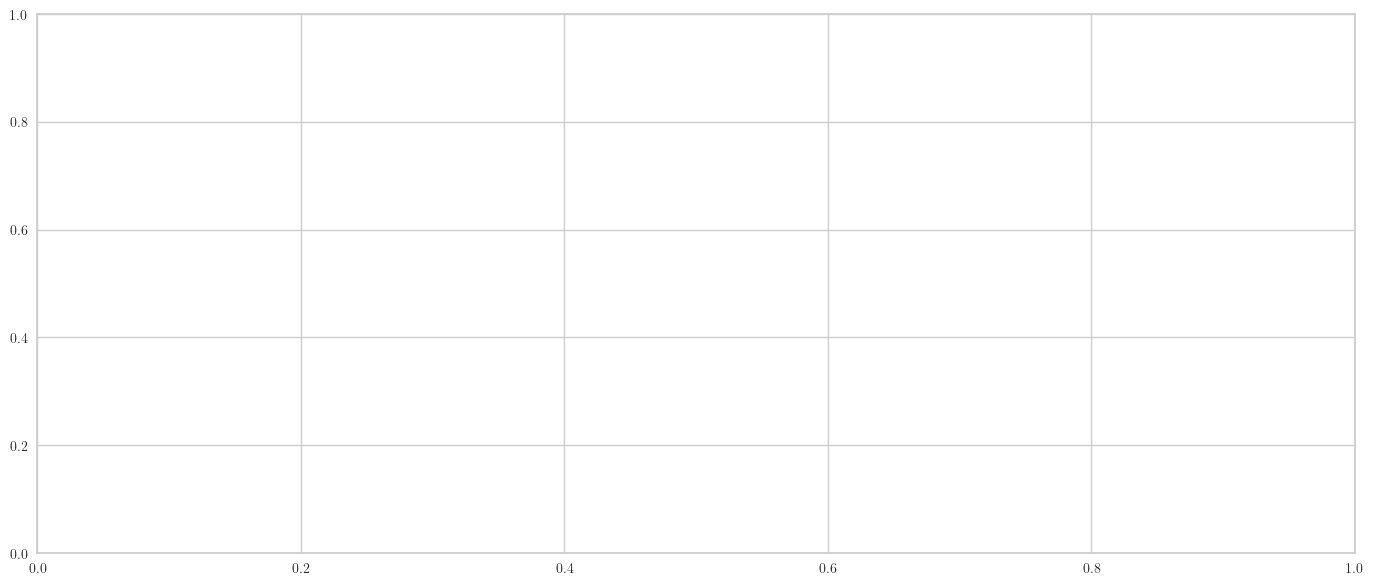

In [36]:
# Code was taken from the following link: https://github.com/lucasplagwitz/grouped_permutation_importance/tree/main

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

#from grouped_permutation_importance import grouped_permutation_importance

params = {'text.usetex': True,
          'font.size': 16,
          'font.family': 'sans-serif',
          'figure.figsize': (17,7)
          }
plt.rcParams.update(params)

model = Pipeline([("MinMax", MinMaxScaler()),  ("SVC", SVC())])
cv = RepeatedStratifiedKFold()

fig, ax = plt.subplots(1, 1)


contextual_features = ["HighBP", 'HighChol', 'CholCheck', 'Stroke','Diabetes','DiffWalk','Sex','Age','Education','Income']
behavioral_features = ['BMI','Smoker','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth']

columns = ["Behavioral", "Contextual"]

behavioral_indexes = [feature_names.index(feature) for feature in behavioral_features]
contextual_indexes = [feature_names.index(feature) for feature in contextual_features]

contextual_indexes.remove(21)

idxs = [behavioral_indexes, contextual_indexes]

r = grouped_permutation_importance(model, X, y, idxs=idxs,
                                   n_repeats=5, random_state=0,
                                   scoring="balanced_accuracy", n_jobs=5,
                                   cv=cv, perm_set="test",)
sorted_idx = r.importances_mean.argsort()[::-1]
box = ax.boxplot(r.importances[sorted_idx].T,
                    patch_artist=True,
                    vert=True, showfliers=False, notch=True,
                    labels=np.array(columns)[sorted_idx])
for patch in box["boxes"]:
    patch.set_facecolor("blue")
    patch.set_alpha(.5)
ax.set_ylabel("information gain")

ax.set_xlabel("feature subset")
#ax.xaxis.set_label_coords(0.2, -0.125)

fig.tight_layout()